In [37]:
import os
import torch
import torchaudio # pip install PySoundFile for windows, pip install sox for linux
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_fp_path = os.path.join("..","data", "train_fp.csv")
train_tp_path = os.path.join("..","data", "train_tp.csv")

In [3]:
df_fp = pd.read_csv(train_fp_path)
df_tp = pd.read_csv(train_tp_path)

In [4]:
df_fp

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,00204008d,21,1,13.8400,3281.2500,14.9333,4125.0000
1,00204008d,8,1,24.4960,3750.0000,28.6187,5531.2500
2,00204008d,4,1,15.0027,2343.7500,16.8587,4218.7500
3,003b04435,22,1,43.2533,10687.5000,44.8587,13687.5000
4,003b04435,23,1,9.1254,7235.1562,15.2091,11283.3984
...,...,...,...,...,...,...,...
7776,ffd88cd84,14,1,3.2000,2531.2500,3.7867,5531.2500
7777,ffebe7313,1,1,35.2000,3843.7500,36.0960,5625.0000
7778,fff163132,17,4,22.5547,1312.5000,25.0880,7406.2500
7779,fff163132,14,1,37.0827,2531.2500,37.6693,5531.2500


In [5]:
df_tp

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70
...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20


In [6]:
df_tp["t_len"] = df_tp["t_max"] - df_tp["t_min"]
df_fp["t_len"] = df_fp["t_max"] - df_fp["t_min"]

In [7]:
len(set(df_tp["recording_id"]).intersection(set(df_fp["recording_id"])))

363

In [8]:
tp_recording_num = len(df_tp["recording_id"])
tp_unique_recording_num = len(df_tp["recording_id"].drop_duplicates())

fp_recording_num = len(df_fp["recording_id"])
fp_unique_recording_num = len(df_fp["recording_id"].drop_duplicates())

print(f"tp tagged species in recordings: {tp_recording_num}")
print(f"tp unique recordings: {tp_unique_recording_num}")

print(f"fp tagged species in recordings: {fp_recording_num}")
print(f"fp unique recordings: {fp_unique_recording_num}")

tp tagged species in recordings: 1216
tp unique recordings: 1132
fp tagged species in recordings: 7781
fp unique recordings: 3958


In [9]:
df_tp["species_id"].value_counts()

23    100
17     68
12     50
1      50
3      50
4      50
5      50
6      50
7      50
8      50
10     50
11     50
13     50
14     50
15     50
16     50
18     50
21     50
0      50
22     44
19     43
20     40
2      37
9      34
Name: species_id, dtype: int64

In [10]:
df_fp["species_id"].value_counts()

23    600
17    600
2     300
4     300
8     300
12    300
16    300
20    300
5     300
9     300
13    300
21    300
6     300
14    300
18    300
3     300
7     300
11    300
15    300
0     300
19    299
10    298
1     298
22    286
Name: species_id, dtype: int64

In [11]:
df_fp.groupby(by="species_id").agg({
    "species_id":"count",
    "f_max":["max","mean","median","std"],
    "songtype_id":["max","min"],
    "t_len":["min","max","median","mean","std"]
})

species_id       f_max                                         \
                count         max         mean       median          std   
species_id                                                                 
0                 300   8250.0000   7525.00000   7500.00000   134.854065   
1                 298   5625.0000   5625.00000   5625.00000     0.000000   
2                 300   3000.0000   3000.00000   3000.00000     0.000000   
3                 300   2812.5000   2812.50000   2812.50000     0.000000   
4                 300   4218.7500   4215.00000   4218.75000    26.293860   
5                 300  11250.0000  10760.62500  10406.25000   417.135797   
6                 300   4406.2500   4130.00000   4406.25000   511.112916   
7                 300  11437.5000  11437.50000  11437.50000     0.000000   
8                 300   5531.2500   5531.25000   5531.25000     0.000000   
9                 300   5250.0000   5250.00000   5250.00000     0.000000   
10                298  10852.7344  10852.73440  10852.73440     0.000000   
11                300   5684.7656   5684.76560   5684.76560     0.000000   
12                300   3281.2500   3281.25000   3281.25000     0.000000   
13                300   1406.2500   1308.75000   1406.25000   213.281810   
14                300   6468.7500   5524.37500   5531.25000   200.117871   
15                300   1125.0000   1125.00000   1125.00000     0.000000   
16                300   4593.7500   4593.75000   4593.75000     0.000000   
17                600   7406.2500   5671.87500   5671.87500  1735.822122   
18                300   5062.5000   5062.50000   5062.50000     0.000000   
19                299   2812.5000   2812.50000   2812.50000     0.000000   
20                300   5718.7500   5718.75000   5718.75000     0.000000   
21                300   4125.0000   4125.00000   4125.00000     0.000000   
22                286  13687.5000  13687.50000  13687.50000     0.000000   
23                600  11627.9297  11455.66405  11455.66405   172.409384   

           songtype_id       t_len                                           
                   max min     min     max   median      mean           std  
species_id                                                                   
0                    1   1  0.7946  1.2907  1.29070  1.274128  8.918183e-02  
1                    1   1  0.8960  0.8960  0.89600  0.896000  2.554049e-15  
2                    1   1  1.7760  1.7760  1.77600  1.776000  2.996123e-15  
3                    1   1  0.7413  0.7414  0.74130  0.741332  4.672556e-05  
4                    1   1  1.8560  2.1867  1.85600  1.862614  4.637536e-02  
5                    1   1  2.3520  3.1094  2.35200  2.670078  3.744105e-01  
6                    1   1  2.0213  2.1440  2.14400  2.116196  5.144186e-02  
7                    1   1  3.1413  3.1414  3.14130  3.141333  4.697778e-05  
8                    1   1  4.1226  4.1227  4.12270  4.122663  4.826996e-05  
9                    1   1  2.8053  2.8054  2.80530  2.805331  4.646237e-05  
10                   1   1  2.4439  2.4439  2.44390  2.443900  2.042888e-15  
11                   1   1  1.1377  1.1378  1.13780  1.137776  4.277967e-05  
12                   1   1  3.1360  3.1360  3.13600  3.136000  2.857326e-15  
13                   1   1  0.6240  3.8720  3.87200  3.309013  1.231537e+00  
14                   1   1  0.2720  0.9227  0.58670  0.588144  6.260595e-02  
15                   1   1  3.3440  3.3440  3.34400  3.344000  2.616071e-15  
16                   4   4  1.8346  1.8347  1.83470  1.834668  4.659534e-05  
17                   4   1  2.5333  6.4534  4.49335  4.493332  1.961636e+00  
18                   1   1  0.6933  0.6934  0.69330  0.693328  4.480977e-05  
19                   1   1  1.5520  1.5520  1.55200  1.552000  2.152418e-15  
20                   1   1  3.4400  3.4400  3.44000  3.440000  2.566693e-15  
21                   1   1  1.0933  1.0934  1.09330  1.093332  4.685303e-05  
22      

In [12]:
df_fp["songtype_id"].value_counts()

1    6881
4     900
Name: songtype_id, dtype: int64

In [13]:
df_tp["songtype_id"].value_counts()

1    1088
4     128
Name: songtype_id, dtype: int64

In [14]:
query_id = "00204008d"
df_fp[df_fp["recording_id"] == query_id]

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,t_len
0,00204008d,21,1,13.8400,3281.25,14.9333,4125.00,1.0933
1,00204008d,8,1,24.4960,3750.00,28.6187,5531.25,4.1227
2,00204008d,4,1,15.0027,2343.75,16.8587,4218.75,1.8560


In [52]:
recording_path = os.path.join("..","recordings","train",f"{query_id}.flac")
waveform, fs = torchaudio.load(recording_path)  # (torch.Tensor, int)
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(fs))

Shape of waveform: torch.Size([1, 2880000])
Sample rate of waveform: 48000


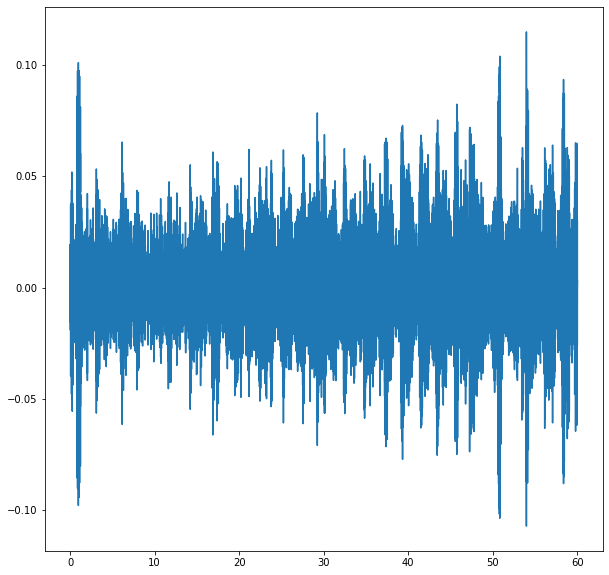

In [55]:
plt.figure(figsize=(10,10))

waveform_1d = waveform.t().numpy()
t_axis = np.linspace(0, len(waveform_1d) / fs, num=len(waveform_1d))

plt.plot(t_axis,waveform_1d)

In [99]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)
print("Shape of spectrogram: {}".format(specgram.size()))

KeyboardInterrupt: 

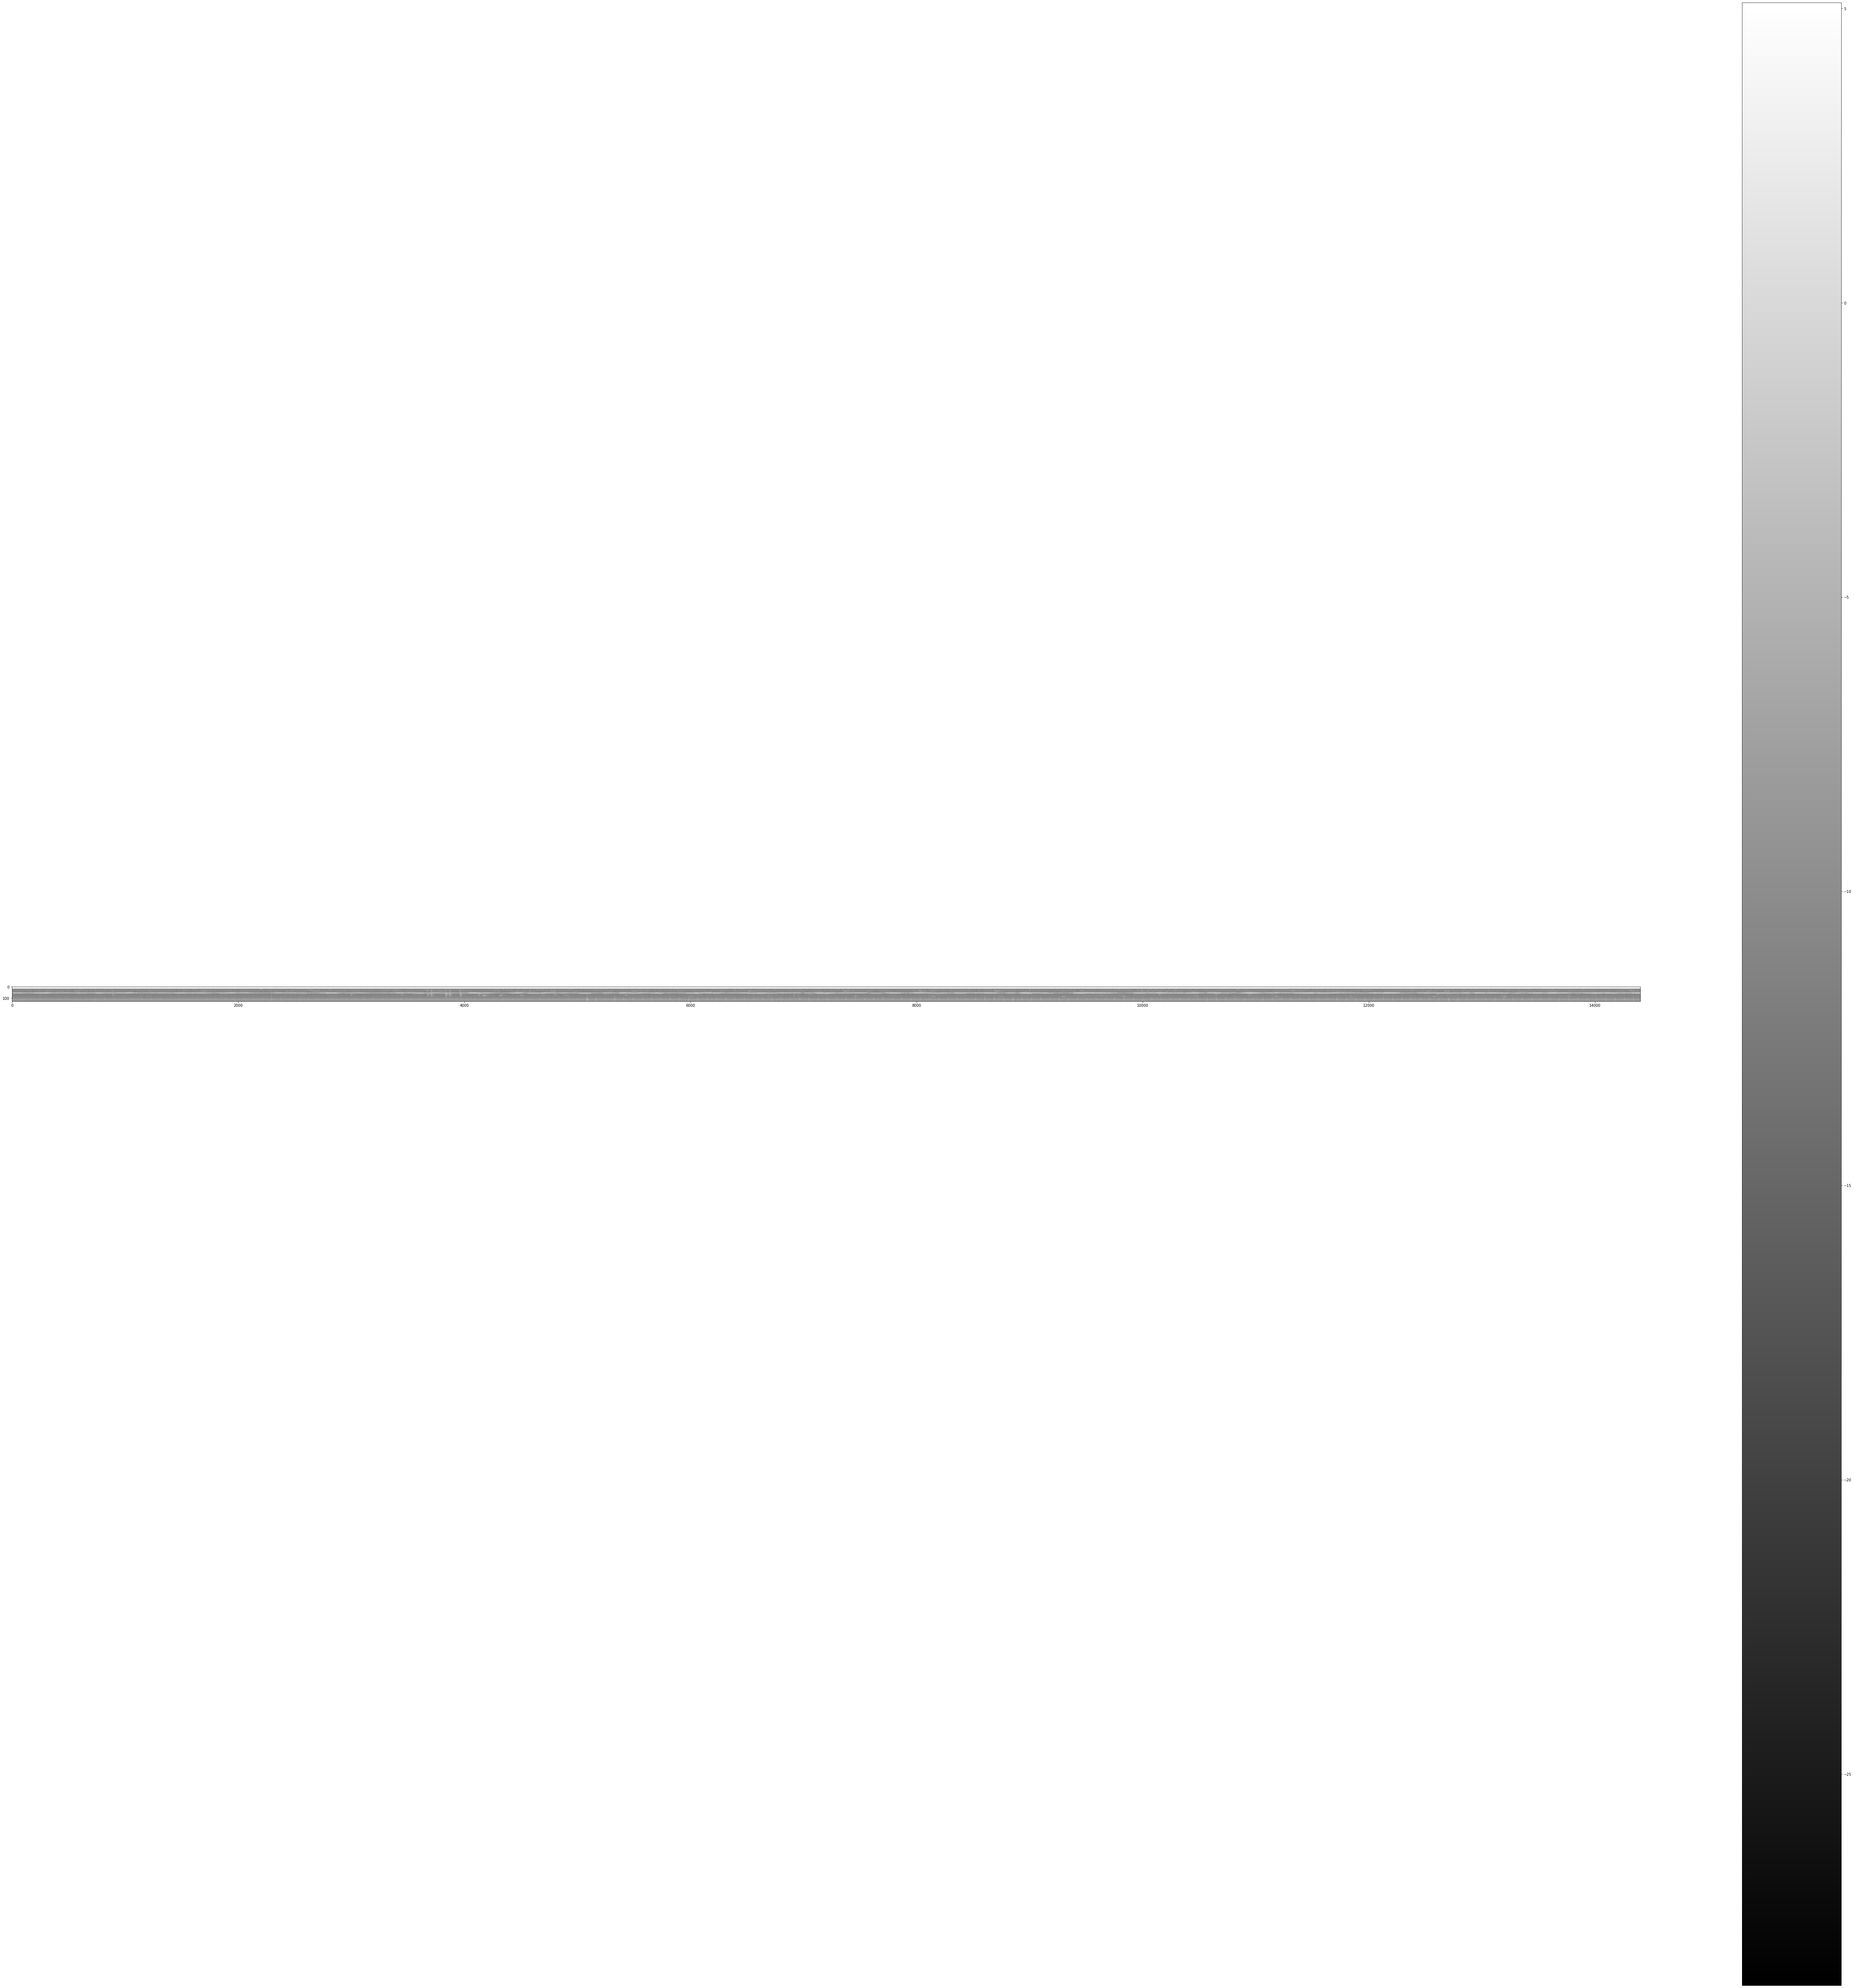

In [107]:
%matplotlib inline

plt.figure(figsize=(100,100))
plt.imshow(specgram[0,:,:].log2().numpy(), cmap='gray')
plt.colorbar()

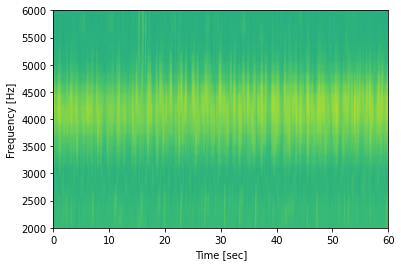

In [109]:
Pxx, freqs, bins, im = plt.specgram(waveform_1d.squeeze(), Fs=fs)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,60)
plt.ylim(2000,6000)
plt.show()

In [102]:
waveform_1d.shape

(2880000, 1)